In [35]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [36]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [37]:
# Load Data Files
mouse_drug_data_to_load = "Resources/mouse_drug_data.csv"
clinical_trial_data_to_load = "Resources/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

In [38]:
# Combine the data into a single dataset
merged_Mouse_Clinical_Trial_data_df = pd.merge(mouse_drug_data, clinical_trial_data, on="Mouse ID")
CT_data_df = merged_Mouse_Clinical_Trial_data_df
# Display the data table for preview
CT_data_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [39]:
#create new DF to hold Drug, Timepoint & Tumor Volume columns
tumor_response_df = CT_data_df[["Drug", "Timepoint", "Tumor Volume (mm3)"]]
#Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_response = pd.DataFrame(tumor_response_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean())
#reset index
mean_tumor_response.reset_index(inplace=True)
#rename columns
mean_tumor_response_df = mean_tumor_response.rename(columns = {"Tumor Volume (mm3)" : "Mean Tumor Volume (mm3)"})
# Preview DataFrame
mean_tumor_response_df.head()

,Drug,Timepoint,Mean Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [40]:
# find Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_err_tumor_response = pd.DataFrame(tumor_response_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem())
#reset index
std_err_tumor_response.reset_index(inplace=True)
drug_std_err_df = std_err_tumor_response.rename(columns = {"Tumor Volume (mm3)" : "Std Error - Tumor Volume (mm3)"})
# Preview DataFrame
drug_std_err_df.head()

,Drug,Timepoint,Std Error - Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [41]:
# Minor Data Munging to Re-Format the STD Error DF
std_err_by_drug = drug_std_err_df.pivot(index ="Timepoint", columns ='Drug', values = "Std Error - Tumor Volume (mm3)")
# Preview that Reformatting worked
std_err_by_drug

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [42]:
# Minor Data Munging to Re-Format the Mean DF
tumor_response_by_drug_df = mean_tumor_response_df.pivot(index ="Timepoint", columns ='Drug', values = "Mean Tumor Volume (mm3)") 
# Preview that Reformatting worked
tumor_response_by_drug_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


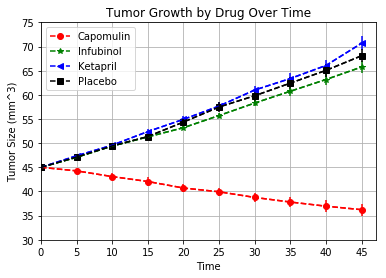

In [65]:
# Generate the Plot (with Error Bars)
time = [0,5,10,15,20,25,30,35,40,45]
#plot for Capomulin
plt.plot(time, tumor_response_by_drug_df["Capomulin"], marker = "o", color="red", label="Capomulin", linestyle="dashed")
plt.errorbar(time, tumor_response_by_drug_df["Capomulin"], yerr = std_err_by_drug["Capomulin"], color="red", linestyle="dashed", label = "" )
#plot for Infubinol
plt.plot(time, tumor_response_by_drug_df["Infubinol"], marker = "*", color="green", label="Infubinol", linestyle="dashed")
plt.errorbar(time, tumor_response_by_drug_df["Infubinol"], yerr = std_err_by_drug["Infubinol"], color="green", linestyle="dashed", label = "")
#plot for Ketapril
plt.plot(time, tumor_response_by_drug_df["Ketapril"], marker = "<", color="blue", label="Ketapril", linestyle="dashed")
plt.errorbar(time, tumor_response_by_drug_df["Ketapril"], yerr = std_err_by_drug["Ketapril"], color="blue", linestyle="dashed", label = "")
#plot for Placebo 
plt.plot(time, tumor_response_by_drug_df["Placebo"], marker = "s", color="black", label="Placebo", linestyle="dashed")
plt.errorbar(time, tumor_response_by_drug_df["Placebo"], yerr = std_err_by_drug["Placebo"], color="black", linestyle="dashed", label = "")
#format axis
plt.xlim(0, 47)
plt.xticks(np.arange(0, 47, step=5))
plt.ylim(30, 75)
#label
plt.xlabel("Time")
plt.ylabel("Tumor Size (mm^3)")
plt.title("Tumor Growth by Drug Over Time")
#legend
plt.legend(loc="upper left")
#add grid
plt.grid()
# Save the Figure
plt.savefig("Plot_Images/Tumor_Growth_by_Drug_over_Time.png")
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [44]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_by_drug = CT_data_df[["Drug", "Timepoint", "Metastatic Sites"]]
metastatic_response = pd.DataFrame(metastatic_by_drug.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean())
#rename columns
mean_metastatic_response_df = metastatic_response.rename(columns = {"Metastatic Sites" : "Mean Metastatic Sites"})
# Preview DataFrame
mean_metastatic_response_df.head()

Mean Metastatic Sites
Drug      Timepoint                       
Capomulin 0                       0.000000
          5                       0.160000
          10                      0.320000
          15                      0.375000
          20                      0.652174

In [45]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_by_drug = CT_data_df[["Drug", "Timepoint", "Metastatic Sites"]]
metastatic_err_response = pd.DataFrame(metastatic_by_drug.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem())
#rename columns
std_err_metastatic_response_df = metastatic_err_response.rename(columns = {"Metastatic Sites" : "Std Error - Metastatic Sites"})
# Preview DataFrame
std_err_metastatic_response_df.head()

Std Error - Metastatic Sites
Drug      Timepoint                              
Capomulin 0                              0.000000
          5                              0.074833
          10                             0.125433
          15                             0.132048
          20                             0.161621

In [46]:
# Minor Data Munging to Re-Format the Mean DF
#reset index so that reformat can occur
mean_metastatic_response_df.reset_index(inplace=True)
mean_metastatic_sites_by_drug_df = mean_metastatic_response_df.pivot(index ="Timepoint", columns ='Drug', values = "Mean Metastatic Sites") 
# Preview that Reformatting worked
mean_metastatic_sites_by_drug_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [47]:
# Minor Data Munging to Re-Format the Data Frames
#reset index so that reformat can occur
std_err_metastatic_response_df.reset_index(inplace=True)
std_err_metastatic_sites_by_drug_df = std_err_metastatic_response_df.pivot(index ="Timepoint", columns ='Drug', values = "Std Error - Metastatic Sites") 
# Preview that Reformatting worked
std_err_metastatic_sites_by_drug_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


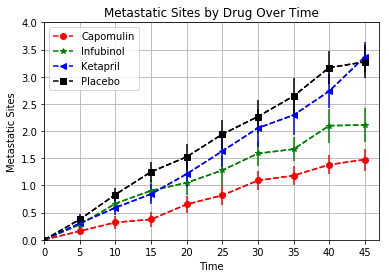

In [66]:
# Generate the Plot (with Error Bars)
time = [0,5,10,15,20,25,30,35,40,45]
#plot for Capomulin
plt.plot(time, mean_metastatic_sites_by_drug_df["Capomulin"], marker = "o", color="red", label="Capomulin", linestyle="dashed")
plt.errorbar(time, mean_metastatic_sites_by_drug_df["Capomulin"], yerr = std_err_metastatic_sites_by_drug_df["Capomulin"], color="red", linestyle="dashed", label = "" )
#plot for Infubinol
plt.plot(time, mean_metastatic_sites_by_drug_df["Infubinol"], marker = "*", color="green", label="Infubinol", linestyle="dashed")
plt.errorbar(time, mean_metastatic_sites_by_drug_df["Infubinol"], yerr = std_err_metastatic_sites_by_drug_df["Infubinol"], color="green", linestyle="dashed", label = "")
#plot for Ketapril
plt.plot(time, mean_metastatic_sites_by_drug_df["Ketapril"], marker = "<", color="blue", label="Ketapril", linestyle="dashed")
plt.errorbar(time, mean_metastatic_sites_by_drug_df["Ketapril"], yerr = std_err_metastatic_sites_by_drug_df["Ketapril"], color="blue", linestyle="dashed", label = "")
#plot for Placebo 
plt.plot(time, mean_metastatic_sites_by_drug_df["Placebo"], marker = "s", color="black", label="Placebo", linestyle="dashed")
plt.errorbar(time, mean_metastatic_sites_by_drug_df["Placebo"], yerr = std_err_metastatic_sites_by_drug_df["Placebo"], color="black", linestyle="dashed", label = "")
#format axis
plt.xlim(0, 47)
plt.xticks(np.arange(0, 47, step=5))
plt.ylim(0, 4)
#label
plt.xlabel("Time")
plt.ylabel("Metastatic Sites")
plt.title("Metastatic Sites by Drug Over Time")
#legend
plt.legend(loc="upper left")
#add grid
plt.grid()
# Save the Figure
plt.savefig("Plot_Images/Metastatic_Sites.png")
# Show the Figure
plt.show()

In [49]:
CT_data_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Survival Rates

In [50]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_group = CT_data_df[["Drug", "Timepoint", "Mouse ID"]]
# Convert to DataFrame
survival_count_MID_df = pd.DataFrame(survival_group.groupby(["Drug", "Timepoint"])["Mouse ID"].count())

In [51]:
#rename columns
survival_count_df = survival_count_MID_df.rename(columns = {"Mouse ID" : "Mouse Count"})
# Preview DataFrame
survival_count_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [52]:
# Minor Data Munging to Re-Format the Data Frames
survival_count_df.reset_index(inplace=True)
survival_rate_df = survival_count_df.pivot(index ="Timepoint", columns ='Drug', values = "Mouse Count") 
# Preview that Reformatting worked
survival_rate_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


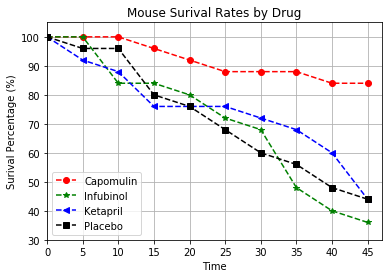

In [112]:
# Generate the Plot (Accounting for percentages)
time = [0,5,10,15,20,25,30,35,40,45]
#plot for Capomulin
plt.plot(time, ((survival_rate_df["Capomulin"])/25*100), marker = "o", color="red", label="Capomulin", linestyle="dashed")
#plot for Infubinol
plt.plot(time, ((survival_rate_df["Infubinol"])/25*100), marker = "*", color="green", label="Infubinol", linestyle="dashed")
#plot for Ketapril
plt.plot(time, ((survival_rate_df["Ketapril"])/25*100), marker = "<", color="blue", label="Ketapril", linestyle="dashed")
#plot for Placebo 
plt.plot(time, ((survival_rate_df["Placebo"])/25*100), marker = "s", color="black", label="Placebo", linestyle="dashed")
#format axis
plt.xlim(0, 47)
plt.xticks(np.arange(0, 47, step=5))
plt.ylim(30, 105)
#labels
plt.xlabel("Time")
plt.ylabel("Surival Percentage (%)")
plt.title("Mouse Surival Rates by Drug")
#legend
plt.legend(loc="lower left")
#add grid
plt.grid()
# Save the Figure
plt.savefig("Plot_Images/Surival_Rates_by_Drug.png")
# Show the Figure
plt.show()

In [54]:
tumor_response_by_drug_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


## Summary Bar Graph

In [69]:
# Calculate the percent changes for each drug
pct_change_Capomulin = ((tumor_response_by_drug_df["Capomulin"][45])-(tumor_response_by_drug_df["Capomulin"][0]))/(tumor_response_by_drug_df["Capomulin"][0])*100
pct_change_Infubinol = ((tumor_response_by_drug_df["Infubinol"][45])-(tumor_response_by_drug_df["Infubinol"][0]))/(tumor_response_by_drug_df["Infubinol"][0])*100
pct_change_Ketapril = ((tumor_response_by_drug_df["Ketapril"][45])-(tumor_response_by_drug_df["Ketapril"][0]))/(tumor_response_by_drug_df["Ketapril"][0])*100
pct_change_Placebo = ((tumor_response_by_drug_df["Placebo"][45])-(tumor_response_by_drug_df["Placebo"][0]))/(tumor_response_by_drug_df["Placebo"][0])*100

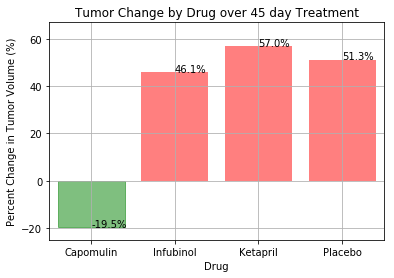

In [172]:
# Store all Relevant Percent Changes into a Tuple
pct_change_tuple = (pct_change_Capomulin , pct_change_Infubinol ,pct_change_Ketapril , pct_change_Placebo)

# Splice the data between passing and failing drugs
failing_drugs = pct_change_tuple[1:]
passing_drugs = pct_change_tuple[:1]

#set x-axis
x_axis = np.arange(len(pct_change_tuple))
# Orient widths. Add labels, tick marks, etc. 
plt.xlim(-0.5, len(x_axis)-0.5)
plt.xticks(np.arange(0, 4, step=1))
plt.ylim(-25, max(pct_change_tuple)+10)
#add grid
plt.grid()
#label x-axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Infubinol", "Ketapril", "Placebo"])
#labels
plt.title("Tumor Change by Drug over 45 day Treatment")
plt.xlabel("Drug")
plt.ylabel("Percent Change in Tumor Volume (%)")
# Use functions to label the percentages of changes
pct_change_labels = ["-19.5%", "46.1%", "57.0%", "51.3%" ]
for i in range(len(pct_change_tuple)):
    plt.text(x = x_axis[i] , y = pct_change_tuple[i], s = pct_change_labels[i], size = 10, )

# Call functions to implement the function calls
graph = plt.bar(x_axis, pct_change_tuple, color = "r", alpha=0.5, align="center")
graph[0].set_color("g")
# Save the Figure
plt.savefig("Plot_Images/Tumor_Change_by_Drug_over_45_day_Treatment.png")

# Show the Figure
plt.show()